<a href="https://colab.research.google.com/github/2403a52269-code/NLP/blob/main/NLP_4_2_52269.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [16]:
import pandas as pd
a=pd.read_csv("IMDB Dataset.csv", on_bad_lines='skip', engine='python');

In [17]:
import nltk
import spacy

In [18]:
from nltk.corpus import movie_reviews, stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
positive_reviews = [
    movie_reviews.raw(fileid)
    for fileid in movie_reviews.fileids('pos')
]

negative_reviews = [
    movie_reviews.raw(fileid)
    for fileid in movie_reviews.fileids('neg')
]

In [21]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [
        word for word in tokens
        if word.isalpha() and word not in stop_words
    ]
    return " ".join(tokens)

In [24]:
nltk.download('punkt_tab')
positive_cleaned = [preprocess(review) for review in positive_reviews]
negative_cleaned = [preprocess(review) for review in negative_reviews]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [25]:
tfidf_pos = TfidfVectorizer(max_features=3000)
tfidf_neg = TfidfVectorizer(max_features=3000)

pos_tfidf_matrix = tfidf_pos.fit_transform(positive_cleaned)
neg_tfidf_matrix = tfidf_neg.fit_transform(negative_cleaned)

In [26]:
def top_tfidf_terms(tfidf_matrix, vectorizer, n=15):
    scores = np.mean(tfidf_matrix.toarray(), axis=0)
    terms = vectorizer.get_feature_names_out()
    tfidf_scores = pd.Series(scores, index=terms)
    return tfidf_scores.sort_values(ascending=False).head(n)

In [27]:
top_pos_terms = top_tfidf_terms(pos_tfidf_matrix, tfidf_pos)
top_neg_terms = top_tfidf_terms(neg_tfidf_matrix, tfidf_neg)

In [28]:
print("Top 15 TF-IDF Terms (Positive Reviews):")
print(top_pos_terms)

print("\nTop 15 TF-IDF Terms (Negative Reviews):")
print(top_neg_terms)

Top 15 TF-IDF Terms (Positive Reviews):
film          0.070067
movie         0.044743
one           0.041024
like          0.028734
story         0.024015
good          0.023184
also          0.022290
life          0.022130
time          0.021931
even          0.021315
character     0.021140
characters    0.021034
would         0.020994
well          0.020371
much          0.020125
dtype: float64

Top 15 TF-IDF Terms (Negative Reviews):
film          0.067053
movie         0.054160
one           0.041621
like          0.032050
even          0.026134
would         0.024256
good          0.024193
bad           0.023525
time          0.022786
story         0.022653
get           0.022441
much          0.021756
characters    0.020827
character     0.020826
plot          0.020659
dtype: float64


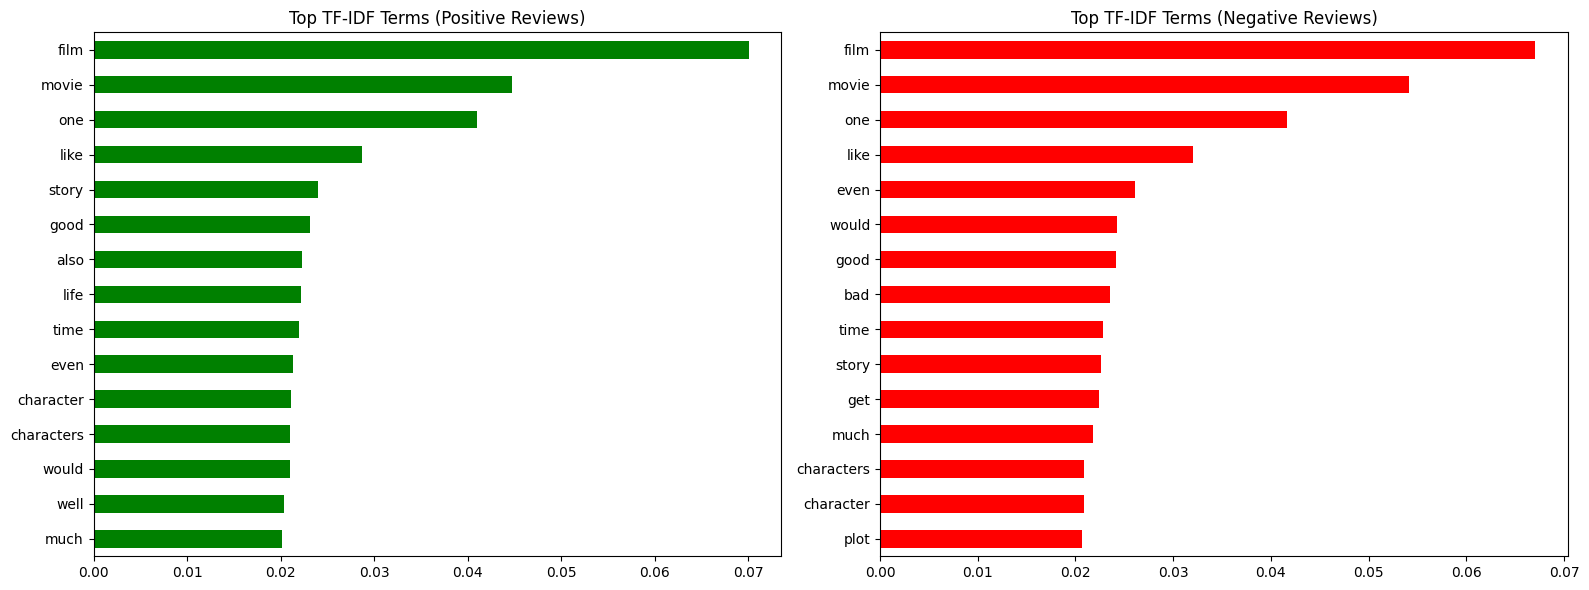

In [29]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_pos_terms.sort_values().plot(
    kind='barh',
    ax=axes[0],
    color='green',
    title='Top TF-IDF Terms (Positive Reviews)'
)

top_neg_terms.sort_values().plot(
    kind='barh',
    ax=axes[1],
    color='red',
    title='Top TF-IDF Terms (Negative Reviews)'
)

plt.tight_layout()
plt.show()